# Importing all required libraries

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

# Reading data from csv file

In [3]:
df= pd.read_csv("Credit card fraud detection.csv")
df

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1


# Understanding and Preapring(cleaning) data

In [4]:
df.shape

(568630, 31)

In [5]:
df.head(10)

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
5,5,0.025302,-0.140514,1.191138,-0.707979,0.430490,0.458973,0.611050,-0.092629,0.180811,...,-0.187739,-0.538518,-0.050465,-0.631553,-0.456480,0.252670,0.066681,0.095812,6901.49,0
6,6,1.016482,-0.397181,0.497868,-0.144463,0.331022,0.629243,0.431262,-0.134007,0.796159,...,-0.171137,-0.287017,-0.178197,-1.297597,1.182503,-0.604228,-0.198163,-0.087619,18954.45,0
7,7,-0.051306,-0.007194,1.139941,-0.877880,0.684668,0.714326,0.892615,-0.908409,0.901938,...,0.620676,-0.920426,0.034660,-1.091527,-0.742075,-0.104863,-1.382522,-2.748268,12298.23,0
8,8,-0.130680,-0.349547,0.425786,-0.760444,1.702777,2.324816,0.568968,0.049100,0.273118,...,-0.132787,-0.284700,-0.227779,2.248754,0.534846,-0.929738,-0.224385,0.243790,22052.90,0
9,9,0.058419,-0.093507,1.117270,-0.735172,0.466111,0.332371,0.683425,-0.136674,0.096409,...,-0.203634,-0.601581,-0.145082,-0.654783,-0.196621,0.226818,0.057119,0.100629,210.35,0


In [6]:
df.tail()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1
568629,568629,-0.795144,0.433236,-0.649140,0.374732,-0.244976,-0.603493,-0.347613,-0.340814,0.253971,...,0.534853,-0.291514,0.157303,0.931030,-0.349423,-1.090974,-1.575113,0.722936,21493.92,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [8]:
df.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,2.076882e-12,-3.248204e-12,-3.636929e-12,3.879536e-12,2.409066e-13,2.768028e-12,-9.496329e-14,2.831363e-12,-2.488498e-12,...,-3.358969e-13,-2.163216e-13,2.562302e-12,-4.924404e-14,-2.931602e-12,4.378988e-13,-1.661857e-12,-2.416333e-12,12041.957635,0.5
std,164149.486121,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528580e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590122e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [9]:
df.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
df['Class'].value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

In [11]:
df.corr()['Class'].sort_values()

V14      -0.805669
V12      -0.768579
V3       -0.682095
V10      -0.673665
V9       -0.585522
V16      -0.573511
V1       -0.505761
V7       -0.491234
V17      -0.476377
V6       -0.435088
V18      -0.410091
V5       -0.338639
V24      -0.130107
V13      -0.071105
V15      -0.037948
Amount    0.002261
V23       0.010255
V22       0.014098
V25       0.061847
V26       0.071052
V28       0.102024
V21       0.109640
V8        0.144294
V20       0.179851
V27       0.214002
V19       0.244081
V2        0.491878
V11       0.724278
V4        0.735981
id        0.864283
Class     1.000000
Name: Class, dtype: float64

# Data Visualization

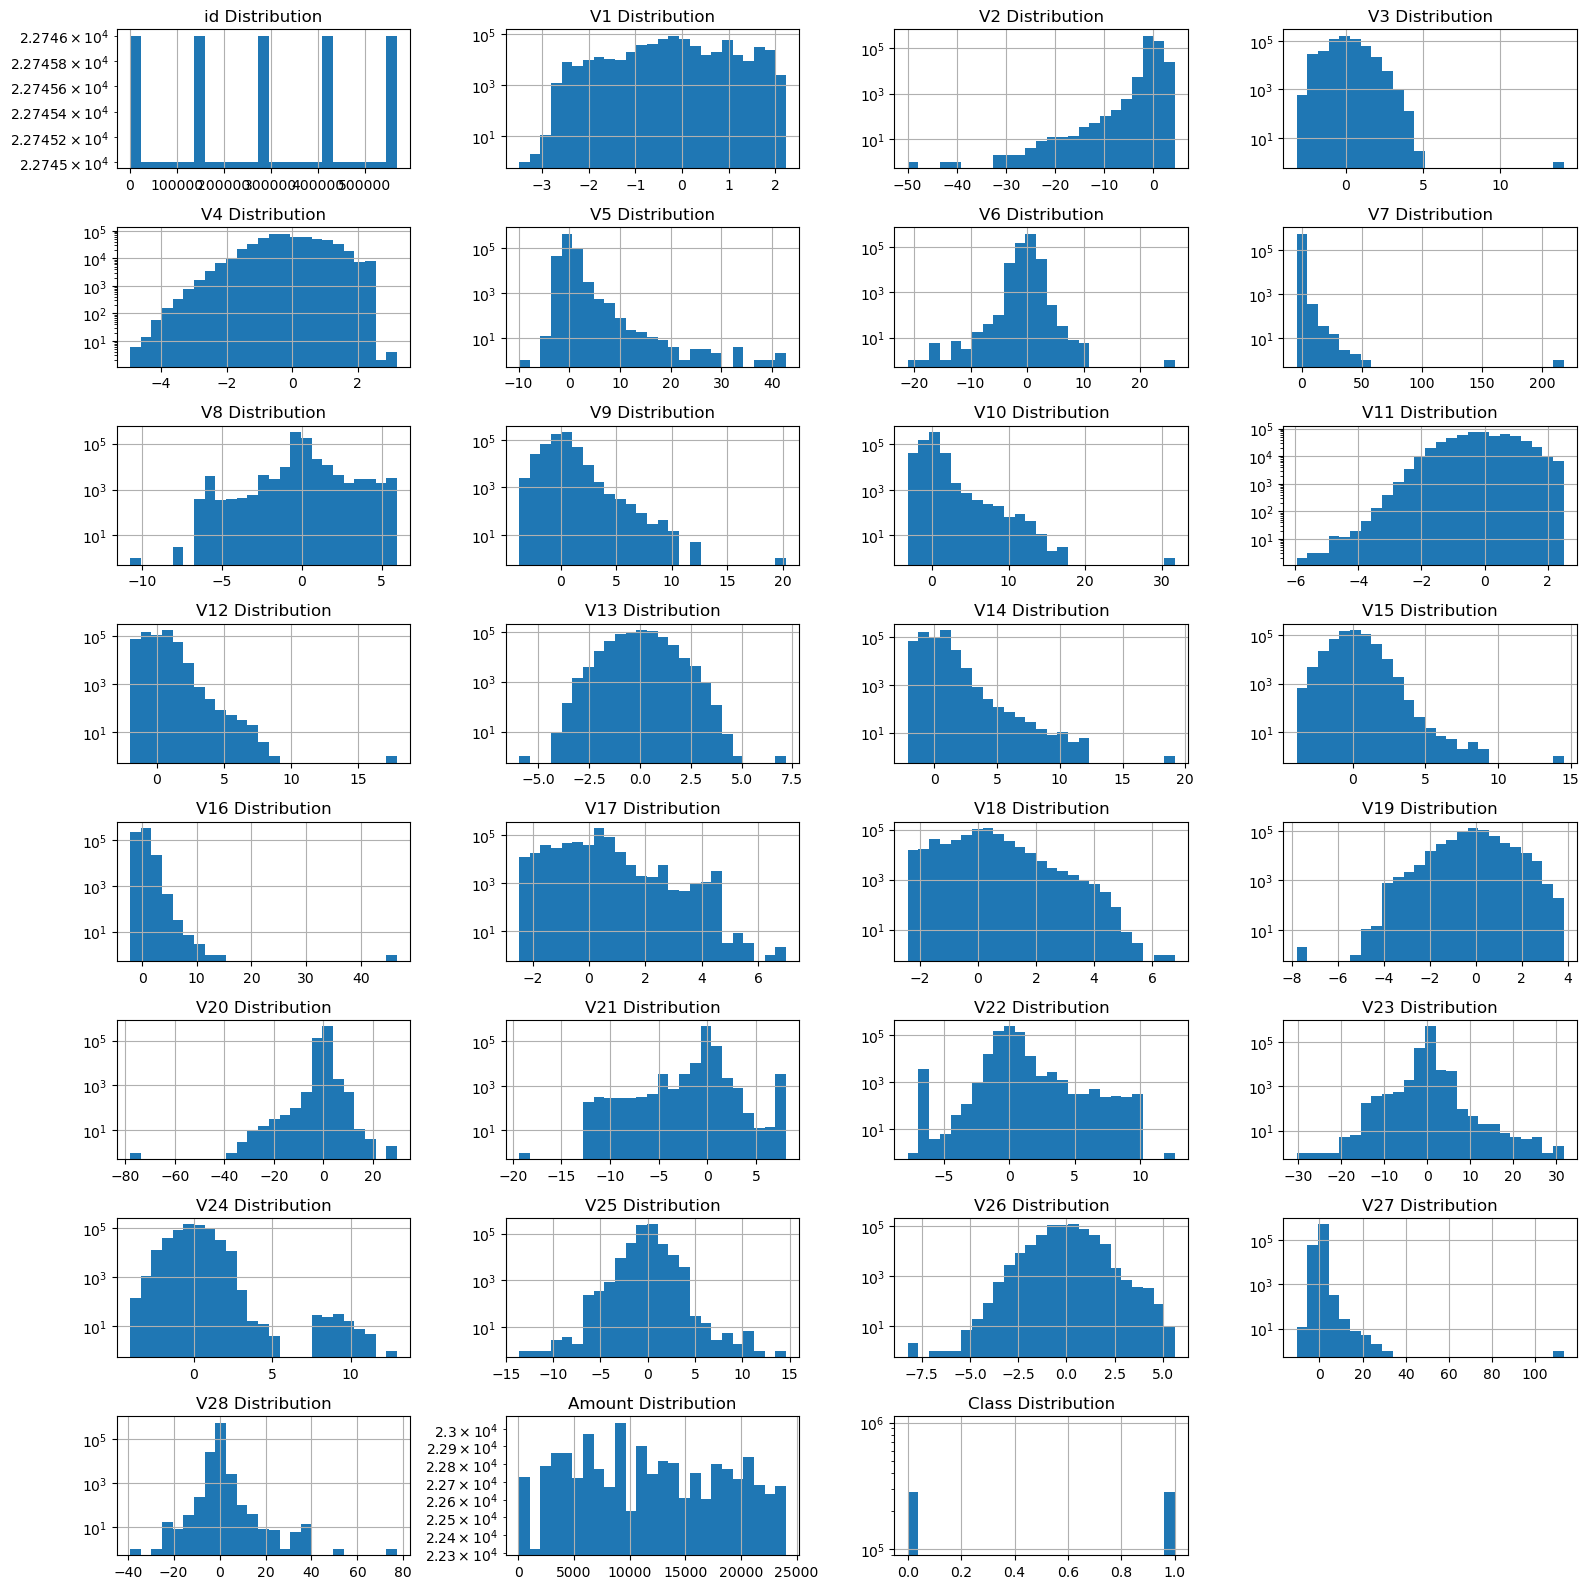

In [12]:
fig = plt.figure(figsize=(16,16))
for i, ax in enumerate(df.columns):
    ax = fig.add_subplot(8,4,i+1)
    df.iloc[:,i].hist(bins = 25)
    ax.set_title(df.columns[i]+" Distribution")
    ax.set_yscale('log')
fig.tight_layout()
plt.show()

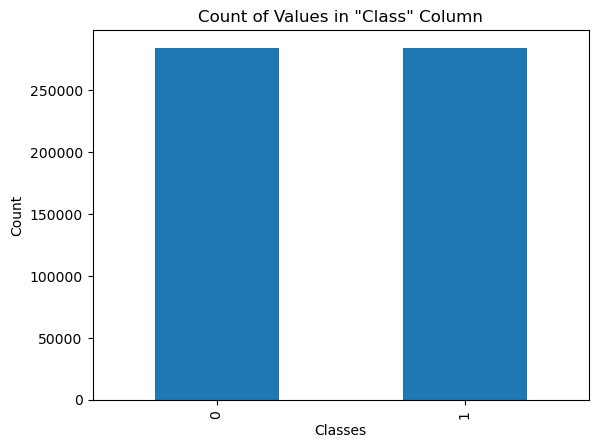

In [13]:
df['Class'].value_counts().plot(kind='bar')
plt.title('Count of Values in "Class" Column')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.show()

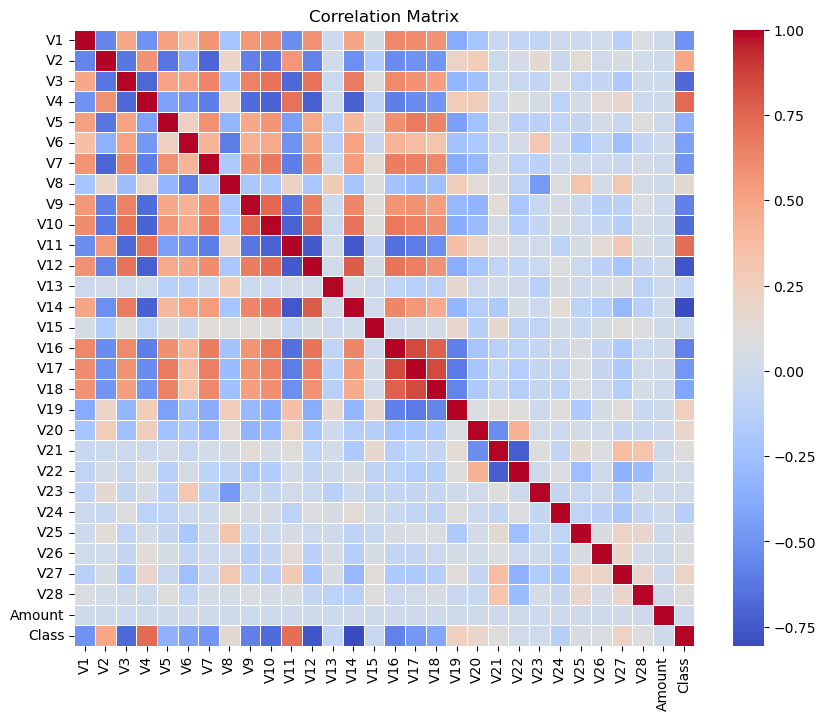

C:\Users\Asma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


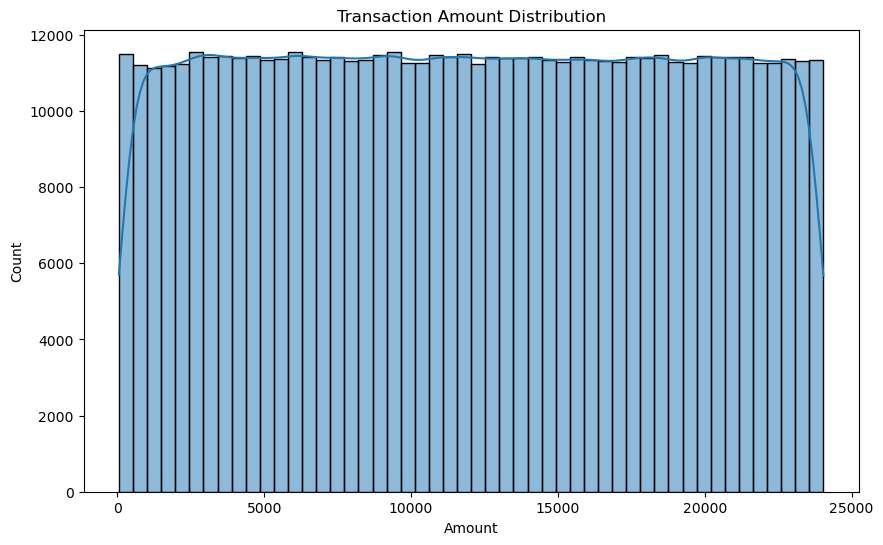

In [14]:
#cheking the corrolation matrix and distribution of the amount.
df_without_id = df.drop('id', axis=1) 

# Now, create the correlation matrix
corr_matrix = df_without_id.corr()

# Visualize the correlation matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Plot a histogram of the transaction amount
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Transaction Amount Distribution')
plt.show()

# Scaling the data

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [16]:
X = df.drop('Class',axis=1)
y = df['Class']

In [17]:
from sklearn.model_selection import train_test_split

# Model Training

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [19]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Model -1 LogisticRegression

In [20]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)

LogisticRegression()

In [21]:
lr_y_pred = lr_model.predict(X_test)
print(f"Confusion Matrix:\n {confusion_matrix(y_test,lr_y_pred)}\n\n\n")
print(f"Classification Report:\n {classification_report(y_test,lr_y_pred)}\n\n\n")
print(f"The accuracy score is: \n{accuracy_score(y_test,lr_y_pred)}\n\n\n")

Confusion Matrix:
 [[85180    72]
 [  202 85135]]



Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85252
           1       1.00      1.00      1.00     85337

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589




The accuracy score is: 
0.9983938003036538





# Model - 2 Decision Tree

In [22]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [28]:
dt_y_pred = dt_model.predict(X_test)
print(f"Confusion Matrix:\n {confusion_matrix(y_test,dt_y_pred)}\n\n\n")
print(f"Classification Report:\n {classification_report(y_test,dt_y_pred)}\n\n\n")
print(f"The accuracy score is: \n{accuracy_score(y_test,dt_y_pred)}\n\n\n")

Confusion Matrix:
 [[85212    40]
 [   53 85284]]



Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85252
           1       1.00      1.00      1.00     85337

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589




The accuracy score is: 
0.9994548300300723





# Model - 3 Random Forest

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)

In [ ]:
rf_y_pred = rf_model.predict(X_test)
print(f"Confusion Matrix:\n {confusion_matrix(y_test,rf_y_pred)}\n\n\n")
print(f"Classification Report:\n {classification_report(y_test,rf_y_pred)}\n\n\n")
print(f"The accuracy score is: \n{accuracy_score(y_test,rf_y_pred)}\n\n\n")

# Model - 4 XGBoosting

In [ ]:
!pip install xgboost
import xgboost as xgb
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train,y_train)

In [ ]:
xgb_y_pred = xgb_model.predict(X_test)
print(f"Confusion Matrix:\n {confusion_matrix(y_test,xgb_y_pred)}\n\n\n")
print(f"Classification Report:\n {classification_report(y_test,xgb_y_pred)}\n")
print(f"The accuracy score is: \n{accuracy_score(y_test,xgb_y_pred)}\n\n\n")

# Model - 5 SVM(Support Vector Machine)

In [ ]:
svm_model = svm.SVC()
svm_model.fit(X_train,y_train)

In [ ]:
svm_y_pred = svm_model.predict(X_test)
print(f"Confusion Matrix:\n {confusion_matrix(y_test,svm_y_pred)}\n\n\n")
print(f"Classification Report:\n {classification_report(y_test,svm_y_pred)}\n\n\n")
print(f"The accuracy score is: \n{accuracy_score(y_test,svm_y_pred)}\n\n\n")

# Model - 6 CatBoost

In [ ]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(iterations=1000, 
                           task_type="CPU", 
                           devices='0:1',
                           loss_function='Logloss',
                           eval_metric='Accuracy',
                           verbose=False)

In [ ]:
model.fit(X_train, y_train)
preds = model.predict(X_test)

In [ ]:
# Evaluate the model
print(f"Confusion Matrix:\n {confusion_matrix(y_test,preds)}\n\n\n")
print(f"Classification Report:\n {classification_report(y_test,preds)}\n")
print(f"The accuracy score is: \n{accuracy_score(y_test,preds)}\n\n\n")

# Model - 7 Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier
nn_model = MLPClassifier(max_iter=150)
nn_model.fit(X_train,y_train)

In [ ]:
nn_y_pred = nn_model.predict(X_test)
print(f"Confusion Matrix:\n {confusion_matrix(y_test,nn_y_pred)}\n\n\n")
print(f"Classification Report:\n {classification_report(y_test,nn_y_pred)}\n\n\n")
print(f"The accuracy score is: \n{accuracy_score(y_test,nn_y_pred)}\n\n\n")

# Conclusion:
This project uses 7 Machine Learning models for better accuracy rate and it achieved 99.9% accuracy in credit card fraud detection.We can also use many other supervised machine learning models but it reached its maxiumum accuracy.